## Work
1. 請比較 SGD optimizer 不同的 momentum 及使用 nesterov 與否的表現

In [1]:
import os
import keras

# 本作業可以不需使用 GPU, 將 GPU 設定為 "無" (若想使用可自行開啟)
os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# 資料前處理 - X 標準化
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# 資料前處理 -Y 轉成 onehot
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [5]:
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128, 64, 32]):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

model = build_mlp(input_shape=x_train.shape[1:])
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
hidden_layer4 (Dense)        (None, 64)                8256      
_________________________________________________________________
hidden_layer5 (Dense)        (None, 32)                2080      
_________________________________________________________________
output (Dense)               (None, 10)                330 

In [7]:
"""Code Here
設定超參數
"""
LEARNING_RATE = 0.001
EPOCHS = 48
BATCH_SIZE = 256

In [10]:
results = {}
"""Code Here
撰寫你的訓練流程並將結果用 dictionary 紀錄
"""
from keras import optimizers

momentums = [0.8, 0.1]
nesterovs = [True, False]

for momentum in momentums:
    for nesterov in nesterovs:
        opt = optimizers.SGD(lr=LEARNING_RATE, decay=1e-6, momentum=momentum, nesterov=nesterov)
        model.compile(optimizer = opt, loss = 'categorical_crossentropy', metrics = ['accuracy'])
        history = model.fit(x_train, y_train,
              batch_size=BATCH_SIZE,
              epochs=EPOCHS,
              validation_data=(x_test, y_test),
              shuffle=True)
        results['%.1f,%s' % (momentum, nesterov)] = history

Train on 50000 samples, validate on 10000 samples
Epoch 1/48
50000/50000 [==============================] - 6s 113us/step - loss: 2.2375 - accuracy: 0.1644 - val_loss: 2.1624 - val_accuracy: 0.1974
Epoch 2/48
50000/50000 [==============================] - 6s 114us/step - loss: 2.0837 - accuracy: 0.2521 - val_loss: 2.0091 - val_accuracy: 0.2746
Epoch 3/48
50000/50000 [==============================] - 6s 112us/step - loss: 1.9468 - accuracy: 0.2986 - val_loss: 1.9009 - val_accuracy: 0.3229
Epoch 4/48
50000/50000 [==============================] - 5s 106us/step - loss: 1.8748 - accuracy: 0.3251 - val_loss: 1.8439 - val_accuracy: 0.3424
Epoch 5/48
50000/50000 [==============================] - 6s 123us/step - loss: 1.8325 - accuracy: 0.3453 - val_loss: 1.8200 - val_accuracy: 0.3513
Epoch 6/48
50000/50000 [==============================] - 6s 116us/step - loss: 1.8019 - accuracy: 0.3560 - val_loss: 1.7826 - val_accuracy: 0.3673
Epoch 7/48
50000/50000 [==============================] - 6s 1

50000/50000 [==============================] - 5s 102us/step - loss: 1.2539 - accuracy: 0.5537 - val_loss: 1.3738 - val_accuracy: 0.5073
Epoch 8/48
50000/50000 [==============================] - 5s 102us/step - loss: 1.2499 - accuracy: 0.5558 - val_loss: 1.3969 - val_accuracy: 0.5034
Epoch 9/48
50000/50000 [==============================] - 5s 103us/step - loss: 1.2464 - accuracy: 0.5578 - val_loss: 1.4046 - val_accuracy: 0.5034
Epoch 10/48
50000/50000 [==============================] - 5s 103us/step - loss: 1.2367 - accuracy: 0.5593 - val_loss: 1.3864 - val_accuracy: 0.5056
Epoch 11/48
50000/50000 [==============================] - 5s 103us/step - loss: 1.2347 - accuracy: 0.5592 - val_loss: 1.3683 - val_accuracy: 0.5148
Epoch 12/48
50000/50000 [==============================] - 5s 104us/step - loss: 1.2220 - accuracy: 0.5672 - val_loss: 1.3995 - val_accuracy: 0.5024
Epoch 13/48
50000/50000 [==============================] - 5s 102us/step - loss: 1.2132 - accuracy: 0.5696 - val_loss: 1

Epoch 14/48
50000/50000 [==============================] - 6s 113us/step - loss: 0.9221 - accuracy: 0.6763 - val_loss: 1.3582 - val_accuracy: 0.5308
Epoch 15/48
50000/50000 [==============================] - 6s 114us/step - loss: 0.9306 - accuracy: 0.6729 - val_loss: 1.4142 - val_accuracy: 0.5177
Epoch 16/48
50000/50000 [==============================] - 6s 116us/step - loss: 0.9230 - accuracy: 0.6771 - val_loss: 1.3583 - val_accuracy: 0.5347
Epoch 17/48
50000/50000 [==============================] - 6s 115us/step - loss: 0.9176 - accuracy: 0.6779 - val_loss: 1.4293 - val_accuracy: 0.5186
Epoch 18/48
50000/50000 [==============================] - 6s 115us/step - loss: 0.9224 - accuracy: 0.6756 - val_loss: 1.4835 - val_accuracy: 0.5076
Epoch 19/48
50000/50000 [==============================] - 6s 115us/step - loss: 0.9220 - accuracy: 0.6768 - val_loss: 1.4123 - val_accuracy: 0.5169
Epoch 20/48
50000/50000 [==============================] - 6s 114us/step - loss: 0.9179 - accuracy: 0.6778

Epoch 21/48
50000/50000 [==============================] - 6s 115us/step - loss: 0.8308 - accuracy: 0.7072 - val_loss: 1.4136 - val_accuracy: 0.5300
Epoch 22/48
50000/50000 [==============================] - 5s 101us/step - loss: 0.8284 - accuracy: 0.7082 - val_loss: 1.5049 - val_accuracy: 0.5125
Epoch 23/48
50000/50000 [==============================] - 5s 102us/step - loss: 0.8237 - accuracy: 0.7105 - val_loss: 1.4308 - val_accuracy: 0.5275
Epoch 24/48
50000/50000 [==============================] - 5s 100us/step - loss: 0.8323 - accuracy: 0.7075 - val_loss: 1.4747 - val_accuracy: 0.5163
Epoch 25/48
50000/50000 [==============================] - 5s 102us/step - loss: 0.8175 - accuracy: 0.7153 - val_loss: 1.4496 - val_accuracy: 0.5191
Epoch 26/48
50000/50000 [==============================] - 5s 102us/step - loss: 0.8191 - accuracy: 0.7135 - val_loss: 1.4126 - val_accuracy: 0.5303
Epoch 27/48
50000/50000 [==============================] - 5s 103us/step - loss: 0.8215 - accuracy: 0.7123

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline
"""Code Here
將結果繪出
"""

def plot(history):
    train_loss = history.history["loss"]
    valid_loss = history.history["val_loss"]

    train_acc = history.history["accuracy"]
    valid_acc = history.history["val_accuracy"]

    plt.plot(range(len(train_loss)), train_loss, label="train loss")
    plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
    plt.legend()
    plt.title("Loss")
    plt.show()

    plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
    plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
    plt.legend()
    plt.title("Accuracy")
    plt.show()

In [13]:
print(results.keys())

dict_keys(['0.8,True', '0.8,False', '0.1,True', '0.1,False'])


0.8,True


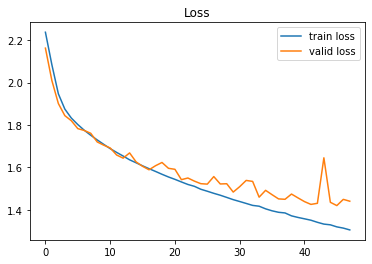

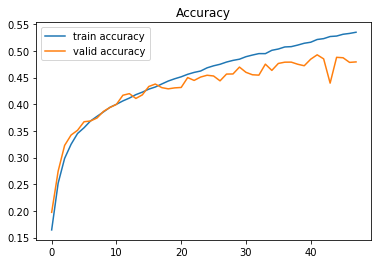

In [14]:
config = '0.8,True'
print(config)
plot(results[config])

0.8,False


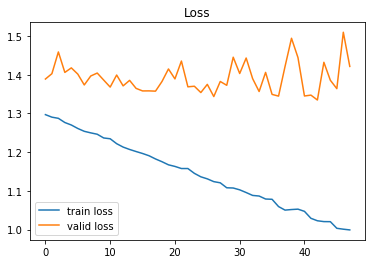

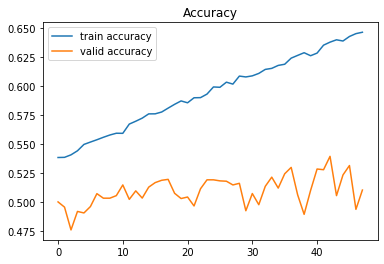

In [15]:
config = '0.8,False'
print(config)
plot(results[config])

0.1,True


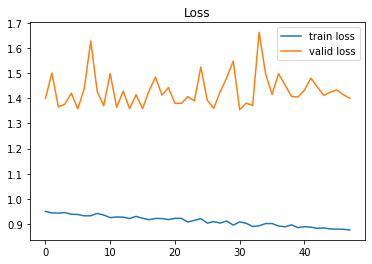

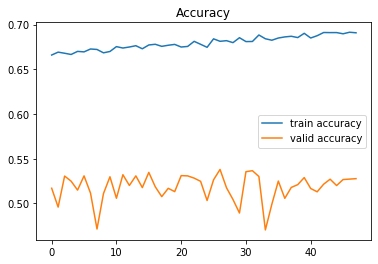

In [16]:
config = '0.1,True'
print(config)
plot(results[config])

0.1,False


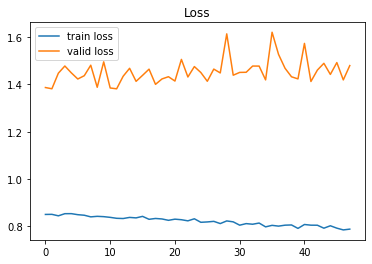

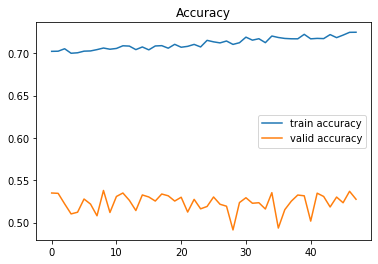

In [17]:
config = '0.1,False'
print(config)
plot(results[config])